In [24]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [53]:
# Функция для чтения файла с bounding boxes
def parse_annotation(txt_file):
    boxes = []
    with open(txt_file, 'r') as file:
        for line in file.readlines():
            coords = line.strip().split()
            # Проверка: должно быть 5 значений (метка + 4 координаты для bounding box)
            if len(coords) == 5:
                try:
                    label = coords[0]  # первая часть строки - метка (например, 'p' или '0')
                    x_min, y_min, width, height = map(float, coords[1:])
                    boxes.append([label, x_min, y_min, width, height])
                except ValueError:
                    print(f"Ошибка преобразования строки: {line}")
            else:
                print(f"Неправильное количество значений в строке: {line}")
    return boxes

# Пример использования
data_dir = "C:/Users/abram/Downloads/archive/data"
example_txt = os.path.join(data_dir, '3274.txt')
bounding_boxes = parse_annotation(example_txt)
print(bounding_boxes)

[['0', 0.565625, 0.5333988212180747, 0.04375, 0.04911591355599214], ['0', 0.4453125, 0.19646365422396855, 0.025, 0.043222003929273084], ['0', 0.3765625, 0.2288801571709234, 0.1125, 0.08840864440078586], ['0', 0.54921875, 0.2318271119842829, 0.1671875, 0.11394891944990176], ['0', 0.40625, 0.5225933202357563, 0.04375, 0.0550098231827112], ['0', 0.57734375, 0.4774066797642436, 0.0296875, 0.0275049115913556], ['0', 0.53671875, 0.574656188605108, 0.0234375, 0.0412573673870334], ['0', 0.48984375, 0.5864440078585462, 0.0234375, 0.0412573673870334], ['0', 0.440625, 0.5697445972495089, 0.03125, 0.0550098231827112], ['0', 0.56328125, 0.41846758349705304, 0.0296875, 0.03143418467583497], ['0', 0.52890625, 0.3742632612966601, 0.0203125, 0.0412573673870334], ['0', 0.4390625, 0.3693516699410609, 0.034375, 0.043222003929273084], ['0', 0.40625, 0.40962671905697445, 0.0375, 0.03732809430255403], ['0', 0.39453125, 0.4656188605108055, 0.0328125, 0.0275049115913556]]


In [57]:
# Функция для преобразования относительных координат в абсолютные
def convert_to_absolute(box, image_width, image_height):
    x_c, y_c, width, height = box
    abs_x_c = int(x_c * image_width)
    abs_y_c = int(y_c * image_height)
    abs_width = int(width * image_width)
    abs_height = int(height * image_height)
    
    abs_x_min = abs_x_c - abs_width // 2
    abs_y_min = abs_y_c - abs_height // 2
    abs_x_max = abs_x_c + abs_width // 2
    abs_y_max = abs_y_c + abs_height // 2
    
    return abs_x_min, abs_y_min, abs_x_max, abs_y_max

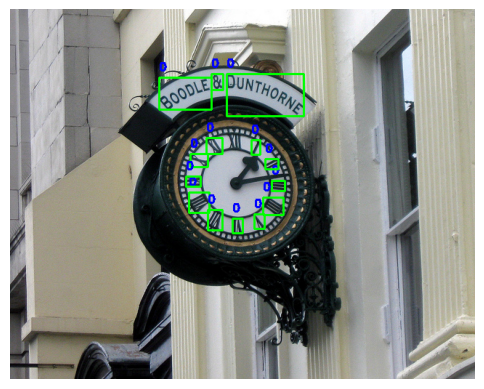

In [58]:
# Функция для визуализации bounding boxes на изображении
def visualize_boxes(image_path, boxes):
    image = cv2.imread(image_path)
    
    # Проверяем, загрузилось ли изображение
    if image is None:
        print(f"Не удалось загрузить изображение: {image_path}")
        return
    
    image_height, image_width, _ = image.shape
    for box in boxes:
        label, x_min, y_min, width, height = box
        abs_x_min, abs_y_min, abs_x_max, abs_y_max = convert_to_absolute([x_min, y_min, width, height], image_width, image_height)
        # Рисуем bounding box
        cv2.rectangle(image, (abs_x_min, abs_y_min), (abs_x_max, abs_y_max), (0, 255, 0), 2)
        # Выводим метку (если нужно)
        cv2.putText(image, label, (abs_x_min, abs_y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    # Визуализация изображения с bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Пример использования
image_path = os.path.join(data_dir, '3274.jpg')
visualize_boxes(image_path, bounding_boxes)

In [59]:
# Функция для анализа размеров bounding boxes
def analyze_boxes(boxes):
    widths = []
    heights = []
    for box in boxes:
        label, x_min, y_min, width, height = box
        widths.append(width)
        heights.append(height)
    
    mean_width = np.mean(widths)
    mean_height = np.mean(heights)
    return mean_width, mean_height, len(boxes)

# Пример использования
mean_width, mean_height, num_boxes = analyze_boxes(bounding_boxes)
print(f"Средняя ширина bounding box: {mean_width}")
print(f"Средняя высота bounding box: {mean_height}")
print(f"Количество текстовых блоков: {num_boxes}")

Средняя ширина bounding box: 0.04676339285714286
Средняя высота bounding box: 0.04967723828234634
Количество текстовых блоков: 14
